Importar Librerias

In [1]:
#eda
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

#wordcloud
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud

#web scrapping
import bs4
import requests
import os
import json

Cargar BD por cada plataforma

In [2]:
coursera_df = pd.read_csv("./Data/Coursera_courses.csv")
edx_df = pd.read_csv("./Data/edx_courses.csv")
udemy_df = pd.read_csv("./Data/udemy_courses.csv",)
coursera_reviews_df = pd.read_csv("./Data/Coursera_reviews.csv")

Eliminar duplicados

In [3]:
#sin duplciados
coursera_df.drop_duplicates(subset=['course_id'],inplace=True)
edx_df.drop_duplicates(subset=['course_url'],inplace=True)
udemy_df.drop_duplicates(subset=['course_id'],inplace=True)
coursera_reviews_df.drop_duplicates(subset=["reviews"],inplace=True)

Corroborando si todos los registros de coursera_df tienen reviews

In [4]:
coursera_df_lista = pd.DataFrame(coursera_df.course_id.unique())
coursera_df_lista.columns = ["Titulo"]

coursera_reviews_df_lista = pd.DataFrame(coursera_reviews_df.course_id.unique())
coursera_reviews_df_lista.columns = ["Titulo"]

coursera_sin_reviews = coursera_df_lista[~coursera_df_lista.Titulo.isin(coursera_reviews_df_lista.Titulo)]
reviews_sin_cabecera = coursera_reviews_df_lista[~coursera_reviews_df_lista.Titulo.isin(coursera_df_lista.Titulo)]
print("existen",len(coursera_sin_reviews),"cursos sin review","y todos los reviews tienen un curso asignado",len(reviews_sin_cabecera))

existen 19 cursos sin review y todos los reviews tienen un curso asignado 0


vamos a llevar el rating del dataset reviews hacia el dataset de coursera

In [5]:
coursera_rating = coursera_reviews_df.groupby(["course_id"]).mean().reset_index()
coursera_df = coursera_df.merge(coursera_rating,left_on="course_id",right_on="course_id",how="left")
coursera_df

C:\Users\wongp\AppData\Local\Temp\ipykernel_7112\1900440834.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  coursera_rating = coursera_reviews_df.groupby(["course_id"]).mean().reset_index()


,name,institution,course_url,course_id,rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,4.750220
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,4.812589
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,4.929116
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,4.774176
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,4.812500
...,...,...,...,...,...
618,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python,3.285714
619,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy,4.571429
620,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach,4.702479
621,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution,NaN


Vamos a tratar de conseguir datos de la misma pag de coursera realizando un proceso de web scrapping para poder completar la informacion

In [6]:
#https://www.coursera.org/api/s12nDerivatives.v1/nOOfCDWeEeuiZgo2K4rorQ?fields=catalogPrice
#https://www.udemy.com/api-2.0/course-landing-components/{course_id}/me/?components=curriculum_context"

In [7]:
'''

#https://www.coursera.org/learn/machine-learning
#ejemplo coursera

res = requests.get("https://www.coursera.org/learn/technical-support-fundamentals")
soup = bs4.BeautifulSoup(res.text,"lxml")
id_curso = json.loads(soup.select(".rc-RatingLink")[0].select("a._1jpd6ix")[0].get("data-click-value"))["s12nId"]
precio = requests.get("https://www.coursera.org/api/s12nDerivatives.v1/{}?fields=catalogPrice".format(id_curso)).json()["elements"][0]['catalogPrice']['amount']
rating = soup.select('.rating-text')[0].get_text() # loopeamos hasta tener el valor
duracion = soup.select('.ProductGlance')[0].select("._16ni8zai.m-b-0")[4].get_text()
subject = soup.select("._1ruggxy")[1].select("a")[0].get_text()
level = soup.select('.ProductGlance')[0].select("._16ni8zai.m-b-0")[3].get_text()
summery = soup.select('.content-inner')[0].getText()
course_type = soup.select('.ProductGlance')[0].select("._16ni8zai.m-b-0")[0].get_text() #revisar
instructor = soup.select('._1qfi0x77.instructor-count-display')
language = soup.select('.ProductGlance')[0].select("._16ni8zai.m-b-0")[5].get_text()
subtitles = soup.select('.ProductGlance')[0].select(".content-inner")[0].get_text()
course_effort = soup.select('.ProductGlance')[0].select("._16ni8zai.m-b-0")[4].get_text()
course_description = 1
num_reviews = soup.select('.rc-ReviewsOverview__totals')[0]
num_reviews2 = soup.select('.rc-ReviewsOverview__totals')[0].find_all("span")[-1].get_text()
'''

'\n\n#https://www.coursera.org/learn/machine-learning\n#ejemplo coursera\n\nres = requests.get("https://www.coursera.org/learn/technical-support-fundamentals")\nsoup = bs4.BeautifulSoup(res.text,"lxml")\nid_curso = json.loads(soup.select(".rc-RatingLink")[0].select("a._1jpd6ix")[0].get("data-click-value"))["s12nId"]\nprecio = requests.get("https://www.coursera.org/api/s12nDerivatives.v1/{}?fields=catalogPrice".format(id_curso)).json()["elements"][0][\'catalogPrice\'][\'amount\']\nrating = soup.select(\'.rating-text\')[0].get_text() # loopeamos hasta tener el valor\nduracion = soup.select(\'.ProductGlance\')[0].select("._16ni8zai.m-b-0")[4].get_text()\nsubject = soup.select("._1ruggxy")[1].select("a")[0].get_text()\nlevel = soup.select(\'.ProductGlance\')[0].select("._16ni8zai.m-b-0")[3].get_text()\nsummery = soup.select(\'.content-inner\')[0].getText()\ncourse_type = soup.select(\'.ProductGlance\')[0].select("._16ni8zai.m-b-0")[0].get_text() #revisar\ninstructor = soup.select(\'._1qfi0

Scrip para obtener datos de Coursera
### demora 20 min en ejecutar

In [8]:
#Scrip para obtener datos de Coursera, demora 20 min en ejecutar

'''
features = ["url","precio","rating","duracion","subject","level","summery","course_type","instructor","language","subtitles","course_effort","num_reviews","num_reviews2"]

urls = coursera_df.course_url[0:10]
coursera_ws = pd.DataFrame(columns=features)


for i in enumerate(urls):
    
    res = requests.get(i[1])
    soup = bs4.BeautifulSoup(res.text,"lxml")
    try: id_curso = json.loads(soup.select(".rc-RatingLink")[0].select("a._1jpd6ix")[0].get("data-click-value"))["s12nId"]
    except: id_curso = None
    try: precio = requests.get("https://www.coursera.org/api/s12nDerivatives.v1/{}?fields=catalogPrice".format(id_curso)).json()["elements"][0]['catalogPrice']['amount']
    except: precio = None
    try: rating = soup.select('.rating-text')[0].get_text() # loopeamos hasta tener el valor
    except: rating = None
    try: duracion = soup.select('.ProductGlance')[0].select("._16ni8zai.m-b-0")[4].get_text()
    except: duracion = None
    try: subject = soup.select("._1ruggxy")[1].select("a")[0].get_text()
    except: subject = None
    try: level = soup.select('.ProductGlance')[0].select("._16ni8zai.m-b-0")[3].get_text()
    except: level = None
    try: summery = soup.select('.content-inner')[0].getText()
    except: summery = None
    try: course_type = soup.select('.ProductGlance')[0].select("._16ni8zai.m-b-0")[0].get_text() #revisar
    except: course_type = None
    try: instructor = soup.select(".instructor-name")[0].get_text()
    except: instructor = None
    try: language = soup.select('.ProductGlance')[0].select("._16ni8zai.m-b-0")[5].get_text()
    except: language = None
    try: subtitles = soup.select('.ProductGlance')[0].select(".content-inner")[0].get_text()
    except: subtitles = None
    try: course_effort = soup.select('.ProductGlance')[0].select("._16ni8zai.m-b-0")[4].get_text()
    except: course_effort = None
    try: num_reviews = soup.select('.rc-ReviewsOverview__totals')[0]
    except: num_reviews = None
    try: num_reviews2 = soup.select('.rc-ReviewsOverview__totals')[0].find_all("span")[-1].get_text()
    except: num_reviews2 = None

    coursera_ws.loc[i[0]] = [i[1],precio,rating,duracion,subject,level,summery,course_type,instructor,language,subtitles,course_effort,num_reviews,num_reviews2]
'''

'\nfeatures = ["url","precio","rating","duracion","subject","level","summery","course_type","instructor","language","subtitles","course_effort","num_reviews","num_reviews2"]\n\nurls = coursera_df.course_url[0:10]\ncoursera_ws = pd.DataFrame(columns=features)\n\n\nfor i in enumerate(urls):\n    \n    res = requests.get(i[1])\n    soup = bs4.BeautifulSoup(res.text,"lxml")\n    try: id_curso = json.loads(soup.select(".rc-RatingLink")[0].select("a._1jpd6ix")[0].get("data-click-value"))["s12nId"]\n    except: id_curso = None\n    try: precio = requests.get("https://www.coursera.org/api/s12nDerivatives.v1/{}?fields=catalogPrice".format(id_curso)).json()["elements"][0][\'catalogPrice\'][\'amount\']\n    except: precio = None\n    try: rating = soup.select(\'.rating-text\')[0].get_text() # loopeamos hasta tener el valor\n    except: rating = None\n    try: duracion = soup.select(\'.ProductGlance\')[0].select("._16ni8zai.m-b-0")[4].get_text()\n    except: duracion = None\n    try: subject = sou

Scrip para obtener datos de Udemy 
### demora 3 horas en ejecutar

In [9]:
#Scrip para obtener datos de Udemy, demora 3 horas en ejecutar
'''
features = ["id","summery","institution","rating","duracion","language","instructor"]

base = udemy_df[["course_id","url"]]
udemy_ws = pd.DataFrame(columns=features)

lista = []

for i in base.index:
    
    res = requests.get(base.loc[i,"url"])
    soup = bs4.BeautifulSoup(res.text,"lxml")
    id = base.loc[i,"course_id"]
    
    #courses = requests.get("https://www.udemy.com/api-2.0/courses/{}".format(id)).json()
    slider = requests.get("https://www.udemy.com/api-2.0/course-landing-components/{}/me/?components=slider_menu".format(id)).json()
    contenido = requests.get("https://www.udemy.com/api-2.0/course-landing-components/{}/me/?components=curriculum_context".format(id)).json()
    instructor = requests.get("https://www.udemy.com/api-2.0/course-landing-components/{}/me/?components=more_courses_by_instructors".format(id)).json()

    
    try: summery = soup.select('.ud-text-md.clp-lead__headline')[0].getText()
    except: summery = None
    try: institution = soup.select('.ud-heading-lg.ud-link-underline.instructor--instructor__title--2DEeI')[0].getText()
    except: institution = None
    try: rating = slider['slider_menu']['data']['rating']
    except: rating = None
    try: duracion = contenido["curriculum_context"]["data"]["estimated_content_length_text"]
    except: duracion = None
    try: language = soup.select('.clp-lead__element-item.clp-lead__locale')[0].get_text()
    except: language = None
    try: instructor = instructor['more_courses_by_instructors']["data"]['instructors'][0]['title']
    except: instructor = None
    

    udemy_ws.loc[i] = [id,summery,institution,rating,duracion,language,instructor]
'''

'\nfeatures = ["id","summery","institution","rating","duracion","language","instructor"]\n\nbase = udemy_df[["course_id","url"]]\nudemy_ws = pd.DataFrame(columns=features)\n\nlista = []\n\nfor i in base.index:\n    \n    res = requests.get(base.loc[i,"url"])\n    soup = bs4.BeautifulSoup(res.text,"lxml")\n    id = base.loc[i,"course_id"]\n    \n    #courses = requests.get("https://www.udemy.com/api-2.0/courses/{}".format(id)).json()\n    slider = requests.get("https://www.udemy.com/api-2.0/course-landing-components/{}/me/?components=slider_menu".format(id)).json()\n    contenido = requests.get("https://www.udemy.com/api-2.0/course-landing-components/{}/me/?components=curriculum_context".format(id)).json()\n    instructor = requests.get("https://www.udemy.com/api-2.0/course-landing-components/{}/me/?components=more_courses_by_instructors".format(id)).json()\n\n    \n    try: summery = soup.select(\'.ud-text-md.clp-lead__headline\')[0].getText()\n    except: summery = None\n    try: inst

Vamos a cargar los dataset generados para limpiarlos, ya que el web scrapping no es perfecto

In [10]:
#cargamos el dataset coursera_ws
coursera_ws = pd.read_csv("d:/Henry/PI 03/Data/Fuentes bs4/coursera_ws.csv",index_col=[0])
coursera_ws.drop(coursera_ws[coursera_ws['duracion'] == " "].index,inplace=True)


# arreglando precio
coursera_ws.precio.unique()

for i in coursera_ws[coursera_ws["precio"]==3108]["precio"].index:
    coursera_ws.loc[i,"precio"] = 777

# arreglando rating
coursera_ws.rating.unique()
coursera_ws["rating"] = coursera_ws["rating"].str[0:3]

# arreglando duracion
coursera_ws.fillna(' ', inplace=True)
duracion_error = coursera_ws[~coursera_ws["duracion"].str.contains("Approx",na = False)]
level_error = coursera_ws[~((coursera_ws["level"].str.contains("Level",na = False))|(coursera_ws["level"].isnull()))]
language_error = coursera_ws[~((coursera_ws["language"].isin(["English","Spanish","French","Portuguese (Brazilian)"]))|(coursera_ws["language"].isnull()))]

coursera_ws["temp_language"] = 0
coursera_ws["temp_level"] = 0
coursera_ws["temp_duracion"] = 0
coursera_ws["temp_effort"] = 0

for i in duracion_error.index:
    #separamos duracion
    
    if coursera_ws.loc[i,"duracion"] in ["English","Spanish","French"]:
        coursera_ws.loc[i,"temp_language"] = coursera_ws.loc[i,"duracion"]
        coursera_ws.loc[i,"duracion"] = " "
    
    if coursera_ws.loc[i,"duracion"] in ["Beginner Level","Intermediate Level","Advanced Level"]:
        coursera_ws.loc[i,"temp_level"] = coursera_ws.loc[i,"duracion"]
        coursera_ws.loc[i,"duracion"] = " "
    
    if "Labs" in coursera_ws.loc[i,"duracion"]:
        coursera_ws.loc[i,"temp_effort"] = coursera_ws.loc[i,"duracion"]
        coursera_ws.loc[i,"duracion"] = " "
    
    if "Course" in coursera_ws.loc[i,"duracion"]:
        coursera_ws.loc[i,"temp_effort"] = coursera_ws.loc[i,"duracion"]
        coursera_ws.loc[i,"duracion"] = " "

for j in level_error.index:
    #separamos level
    
    if "Approx" in coursera_ws.loc[j,"level"]:
        coursera_ws.loc[j,"temp_duracion"] = coursera_ws.loc[j,"level"]
        coursera_ws.loc[j,"level"] = " "
    
    if "Labs" in coursera_ws.loc[i,"level"]:
        coursera_ws.loc[i,"temp_effort"] = coursera_ws.loc[i,"level"]
        coursera_ws.loc[i,"level"] = "  "
        
    if "Course" in coursera_ws.loc[j,"level"]:
        coursera_ws.loc[j,"temp_duracion"] = coursera_ws.loc[j,"level"]
        coursera_ws.loc[j,"level"] = " "
        
for k in language_error.index:
    #separamos language
    
    if "Approx" in coursera_ws.loc[k,"language"]:
        coursera_ws.loc[k,"temp_duracion"] = coursera_ws.loc[k,"language"]
        coursera_ws.loc[k,"language"] = " "
        
    if "Course" in coursera_ws.loc[k,"language"]:
        coursera_ws.loc[k,"temp_duracion"] = coursera_ws.loc[k,"language"]
        coursera_ws.loc[k,"language"] = " "
    
    if coursera_ws.loc[k,"language"] in ["Beginner Level","Intermediate Level","Intermediate Level"]:
        coursera_ws.loc[k,"temp_level"] = coursera_ws.loc[k,"language"]
        coursera_ws.loc[k,"language"] = " "

for n in coursera_ws.index:
    
    if coursera_ws.loc[n,"temp_language"] != 0 and coursera_ws.loc[n,"temp_language"] != " ":
        coursera_ws.loc[n,"language"] = coursera_ws.loc[n,"temp_language"]
    if coursera_ws.loc[n,"temp_level"] != 0 and coursera_ws.loc[n,"temp_level"] != " ":
        coursera_ws.loc[n,"level"] = coursera_ws.loc[n,"temp_level"]
    if coursera_ws.loc[n,"temp_duracion"] != 0 and coursera_ws.loc[n,"temp_duracion"] != " " and coursera_ws.loc[n,"temp_duracion"] != "Coursera Labs":
        coursera_ws.loc[n,"duracion"] = coursera_ws.loc[n,"temp_duracion"] 
    if coursera_ws.loc[n,"temp_effort"] != 0 and coursera_ws.loc[n,"temp_effort"] != " ":
        coursera_ws.loc[n,"course_effort"] = coursera_ws.loc[n,"temp_effort"]

coursera_ws['duracion_int'] = coursera_ws['duracion'].apply(lambda x: x.split(" ")[1])
coursera_ws['duracion_unit'] = coursera_ws['duracion'].apply(lambda x: x.split(" ")[2] if x!=" " else " ")
coursera_ws.drop(["num_reviews","temp_language","temp_level","temp_duracion","temp_effort","rating"],axis=1,inplace=True)
#como ya tenemos rating, vamos a dropear esta para usar la que se nos dió originalmente

In [11]:
#cargamos el dataset de udemy_ws y lo limpiamos
udemy_ws = pd.read_csv("d:/Henry/PI 03/Data/Fuentes bs4/udemy_ws.csv",index_col=[0])


Ya que ahora tenemos más información, vamos a proceder a consolidar la informacion en los datasets para poder analizarla

In [12]:
udemy_df = udemy_df.merge(udemy_ws,left_on="course_id",right_on="id",how="left")
coursera_df = coursera_df.merge(coursera_ws,left_on="course_url",right_on="url",how="left")

udemy_df.drop(["id"],inplace=True,axis=1)
coursera_df.drop(["url"],inplace=True,axis=1)

Vamos a homologar en la medida de los posible las cabeceras para tener un trabajo mas limpio

In [13]:
udemy_dic = {
'course_title':'title',
'summery':'summary',
'num_subscribers':'n_enrolled',
'institution':'institution',
'instructor':'instructors',
'level':'Level',
'subject':'subject',
'language':'language',
'content_duration':'course_length_hours',
'price':'price',
'url':'url',
'course_id':'course_id',
'rating':'rating',
'num_reviews':'num_reviews',
'published_timestamp':'published_timestamp',
'num_lectures':'num_lectures',
'duracion':'duracion',
'is_paid':'is_paid'}

coursera_dic = {
'name':'title',
'summery':'summary',
'n_enrolled':'n_enrolled',
'course_type':'course_type',
'institution':'institution',
'instructor':'instructors',
'level':'Level',
'subject':'subject',
'language':'language',
'subtitles':'subtitles',
'course_effort':'course_effort',
'duracion_int':'course_length_hours',
'precio':'price',
'course_url':'url',
'course_id':'course_id',
'rating':'rating',
'num_reviews2':'num_reviews2',
'duracion':'duracion',
'duracion_unit':'duracion_unit'
}
edx_dic = {
'title':'title',
'summary':'summary',
'n_enrolled':'n_enrolled',
'course_type':'course_type',
'institution':'institution',
'instructors':'instructors',
'Level':'Level',
'subject':'subject',
'language':'language',
'subtitles':'subtitles',
'course_effort':'course_effort',
'course_length':'course_length_hours',
'price':'price',
'course_url':'url',
'course_description':'course_description',
'course_syllabus':'course_syllabus'
}


#ajuste de datos
udemy_df.rename(udemy_dic,axis=1,inplace=True)
coursera_df.rename(coursera_dic,axis=1,inplace=True)
edx_df.rename(edx_dic,axis=1,inplace=True)
coursera_reviews_df.rename(coursera_dic,axis=1,inplace=True)
edx_df["price_edx"] = edx_df["price"]
coursera_df["price"] = coursera_df["price"].apply(lambda x: 0 if x == " " else x)
edx_df["price"] = edx_df["price"].apply(lambda x: float(x.split(" ")[5].replace("$","")))
print("convertido!")

convertido!


funciones para realizar un word cloud

In [14]:
def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed_join = "".join(test_punc_removed)
    test_punc_removed_join_clean = [palabra for palabra in test_punc_removed_join.split() if palabra not in stopwords.words("english")]
    test_punc_removed_join_clean_join = " ".join(test_punc_removed_join_clean)
    return test_punc_removed_join_clean_join

def word_cloud(series,titulo):
    sentences = series.to_list()
    sentences_all = " ".join(sentences)

    plt.figure(figsize=(10,10))
    plt.imshow(WordCloud().generate(sentences_all))
    plt.title(titulo,fontsize=20)
    plt.axis('off')


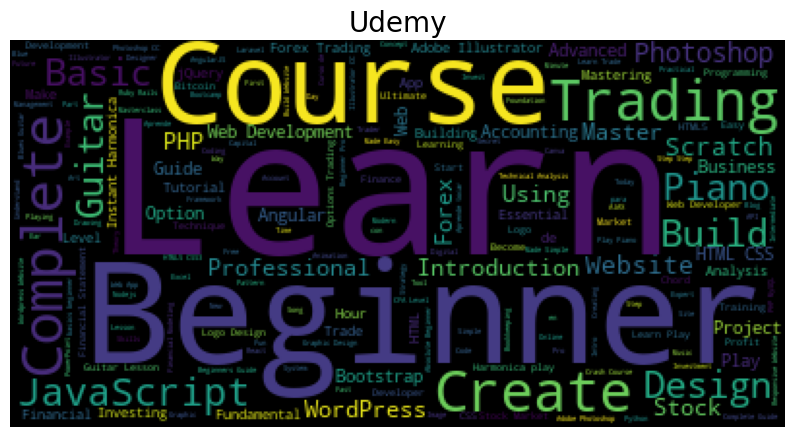

In [15]:
keywords = udemy_df["title"].apply(message_cleaning)
word_cloud(keywords,"Udemy")

Va a ser importante homologar la columna "subject" para poder realizar comparaciones entre plataformas en caso tengan temas similares

In [16]:
homologador = {
'Business Finance':'Business',
'Graphic Design':'Design',
'Musical Instruments':'Music',
'Web Development':'Information Technology',
'Data Science':'Information Technology',
'Arts and Humanities':'Arts and Humanities',
'Personal Development':'Personal Development',
'Information Technology':'Information Technology',
'Business':'Business',
'Health':'Health',
'Computer Science':'Information Technology',
'Language Learning':'Language Learning',
'Social Sciences':'Arts and Humanities',
'Math and Logic':'Science and Engineering',
'Science and Engineering':'Science and Engineering',
'Education & Teacher Training':'Personal Development',
'Data Analysis & Statistics':'Information Technology',
'Business & Management':'Business',
'Communication':'Communication',
'Health & Safety':'Health',
'Math':'Math and Logic',
'Humanities':'Arts and Humanities',
'Ethics':'Arts and Humanities',
'Economics & Finance':'Business',
'Food & Nutrition':'Health',
'Biology & Life Sciences':'Health',
'Architecture':'Science and Engineering',
'Medicine':'Health',
'Environmental Studies':'Science and Engineering',
'Chemistry':'Science and Engineering',
'Art & Culture':'Arts and Humanities',
'Language':'Language Learning',
'Engineering':'Science and Engineering',
'Philosophy & Ethics':'Arts and Humanities',
'Electronics':'Science and Engineering',
'History':'Arts and Humanities',
'Literature':'Arts and Humanities',
'Physics':'Science and Engineering',
'Law':'Arts and Humanities',
'Design':'Design',
'Science':'Science and Engineering',
'Music':'Music',
'Energy & Earth Sciences':'Science and Engineering',
'Philanthropy':'Arts and Humanities',
}

In [17]:
udemy_df["subject_homologado"] = udemy_df["subject"].map(homologador)
coursera_df["subject_homologado"] = coursera_df["subject"].map(homologador)
edx_df["subject_homologado"] = edx_df["subject"].map(homologador)
#coursera_reviews_df["subject_homologado"] = coursera_reviews_df["subject"].map(homologador)

In [18]:
udemy_df.groupby(["subject_homologado"]).mean()

C:\Users\wongp\AppData\Local\Temp\ipykernel_7112\292033485.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  udemy_df.groupby(["subject_homologado"]).mean()


,course_id,is_paid,price,n_enrolled,num_reviews,num_lectures,course_length_hours,rating
subject_homologado,,,,,,,,
Business,643844.401674,0.919665,68.552301,1563.774895,63.516318,32.430962,3.552999,3.904600
Design,720273.257048,0.941957,57.827529,1763.097844,61.475954,32.054726,3.580542,3.900329
Information Technology,706854.250833,0.889167,77.033333,6650.476667,358.354167,52.817500,5.594792,4.107008
Music,638648.450000,0.932353,49.558824,1245.130882,46.652941,38.316176,2.854387,4.257760


In [19]:
udemy_df[udemy_df["price"]!=0].groupby(["subject_homologado"]).mean()

C:\Users\wongp\AppData\Local\Temp\ipykernel_7112\1212605656.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  udemy_df[udemy_df["price"]!=0].groupby(["subject_homologado"]).mean()


,course_id,is_paid,price,n_enrolled,num_reviews,num_lectures,course_length_hours,rating
subject_homologado,,,,,,,,
Business,643762.205641,1.0,74.540491,1151.485896,47.108280,33.617834,3.675675,3.879504
Design,713143.603873,1.0,61.390845,1370.294014,46.644366,32.799296,3.683011,3.880061
Information Technology,711008.176195,1.0,86.635426,5246.327085,318.202437,56.405811,5.972790,4.089038
Music,631972.184543,1.0,53.154574,854.817035,39.266562,39.621451,2.949238,4.243904


### Homologacion de datasets para variables de interés

#### Precio

Precio promedio por curso (sin contar gratuitos con certificado)

In [20]:
precio_general = pd.concat([udemy_df[udemy_df["price"]!=0]["price"],coursera_df[coursera_df["price"]!=0]["price"],edx_df[edx_df["price"]!=0]["price"]]).reset_index(drop=True).mean()
precio_general

77.58622144877093

In [21]:
def price_homologado(x):
    if x == 0:
        return "gratis"
    if x > 0 and x < 70:
        return "1-70"
    if x >= 70 and x < 151:
        return "71-150"
    if x >= 151:
        return "mayor a 151"

udemy_df["precio_homologado"] = udemy_df["price"].apply(price_homologado)
coursera_df["precio_homologado"] = coursera_df["price"].apply(price_homologado)
edx_df["precio_homologado"] = edx_df["price"].apply(price_homologado)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, '5.0'),
  Text(1, 0, '10.0'),
  Text(2, 0, '15.0'),
  Text(3, 0, '19.0'),
  Text(4, 0, '25.0'),
  Text(5, 0, '29.0'),
  Text(6, 0, '30.0'),
  Text(7, 0, '39.0'),
  Text(8, 0, '40.0'),
  Text(9, 0, '49.0'),
  Text(10, 0, '49.9'),
  Text(11, 0, '49.99'),
  Text(12, 0, '50.0'),
  Text(13, 0, '59.0'),
  Text(14, 0, '60.0'),
  Text(15, 0, '65.0'),
  Text(16, 0, '69.0'),
  Text(17, 0, '70.0'),
  Text(18, 0, '75.0'),
  Text(19, 0, '79.0'),
  Text(20, 0, '90.0'),
  Text(21, 0, '99.0'),
  Text(22, 0, '100.0'),
  Text(23, 0, '119.0'),
  Text(24, 0, '125.0'),
  Text(25, 0, '129.0'),
  Text(26, 0, '139.0'),
  Text(27, 0, '149.0'),
  Text(28, 0, '150.0'),
  Text(29, 0, '159.0'),
  Text(30, 0, '166.0'),
  Text(31, 0, '169.0'),
  Text(32, 0, '179.0'),
  Text(33, 0, '199.0'),
  

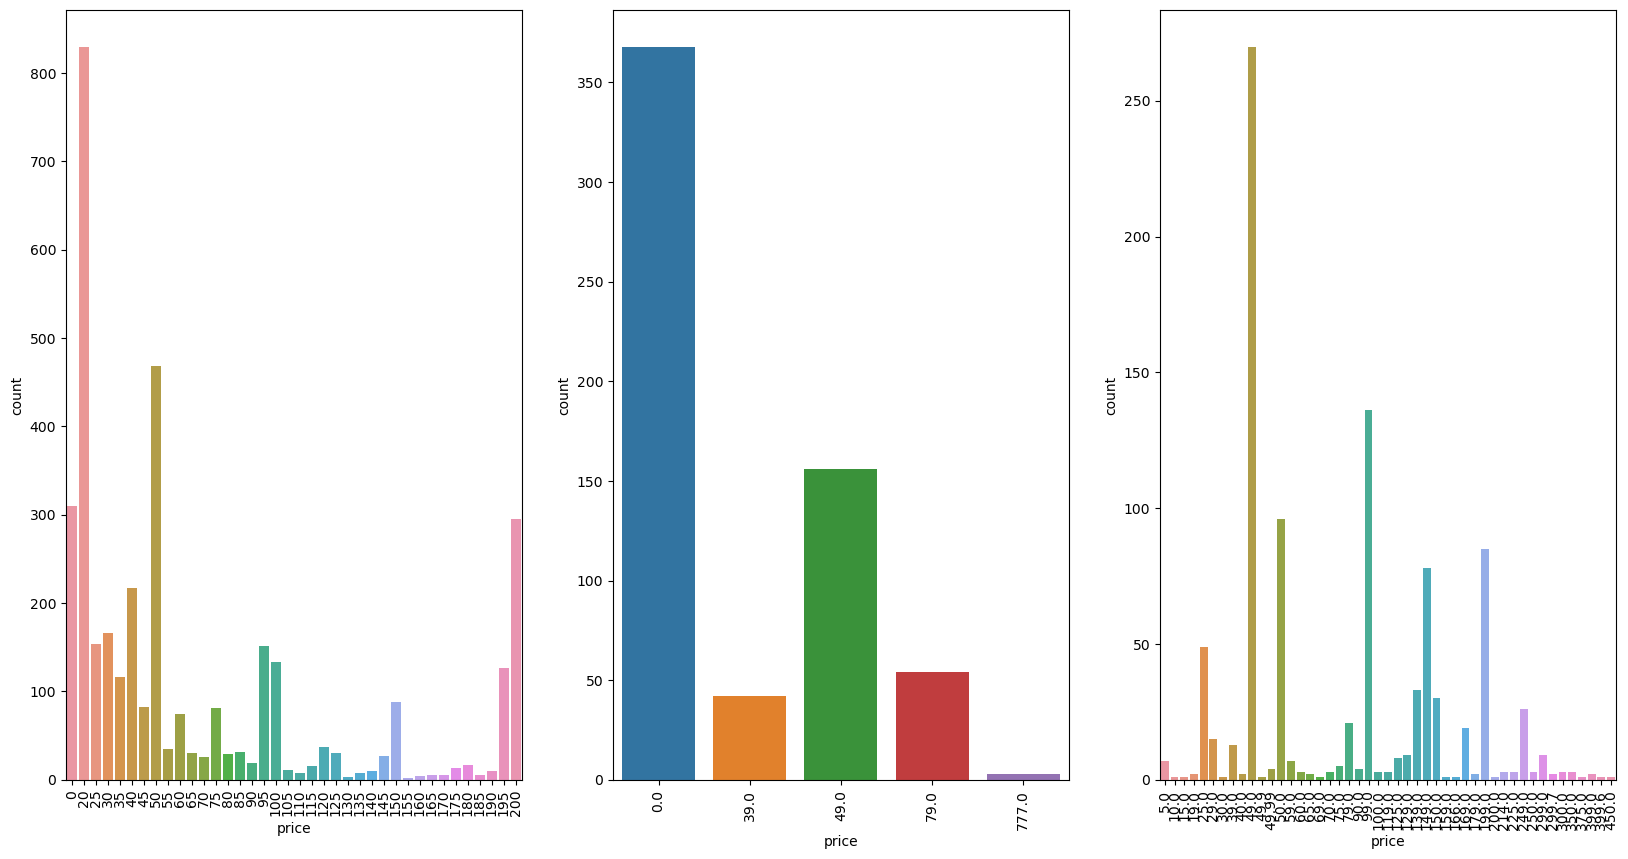

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.countplot(x=udemy_df["price"])
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.countplot(x=coursera_df["price"])
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.countplot(x=edx_df["price"])
plt.xticks(rotation=90)

Text(0.5, 0.98, 'Udemy                                                                                    Coursera                                                                                                  Edx')

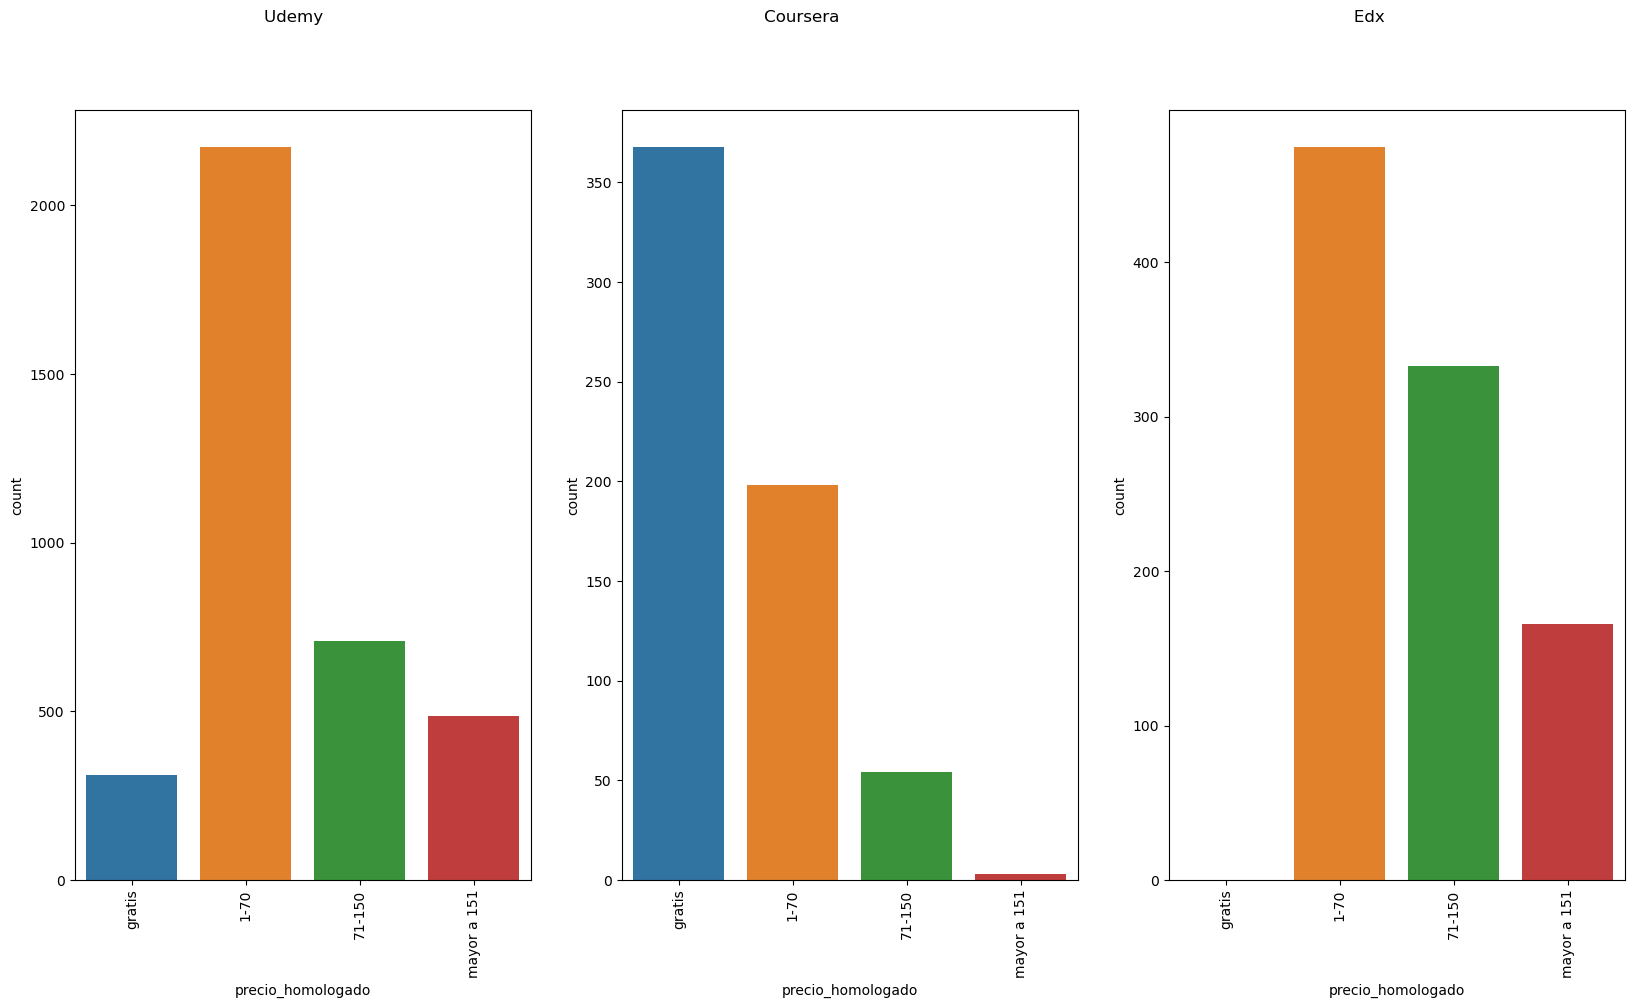

In [23]:

plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.countplot(x=udemy_df["precio_homologado"], order=["gratis","1-70","71-150","mayor a 151"])
plt.xticks(rotation=90)



plt.subplot(1,3,2)
sns.countplot(x=coursera_df["precio_homologado"], order=["gratis","1-70","71-150","mayor a 151"])
plt.xticks(rotation=90)


plt.subplot(1,3,3)
sns.countplot(x=edx_df["precio_homologado"], order=["gratis","1-70","71-150","mayor a 151"])
plt.xticks(rotation=90)

plt.suptitle("Udemy                                                                                    Coursera                                                                                                  Edx")


Como vemos la mayor cantidad de cursos están en el rango de 1-70 usd en todas las plataformas.

In [24]:
udemy_df["venta"] = udemy_df["price"] * udemy_df["n_enrolled"]
edx_df["n_enrolled"] = edx_df["n_enrolled"].apply(lambda x: float(x.replace(",","")) if isinstance(x,str) else x )
edx_df["venta"] = edx_df["price"] * edx_df["n_enrolled"]

<AxesSubplot:xlabel='precio_homologado', ylabel='n_enrolled'>

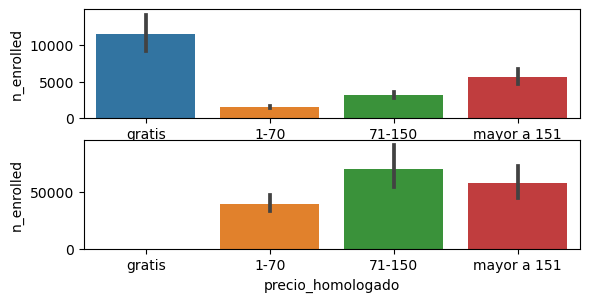

In [25]:
plt.subplot(3,1,1)
sns.barplot(data=udemy_df, x="precio_homologado", y="n_enrolled",order=["gratis","1-70","71-150","mayor a 151"])

plt.subplot(3,1,2)
sns.barplot(data=edx_df, x="precio_homologado", y="n_enrolled",order=["gratis","1-70","71-150","mayor a 151"])

<AxesSubplot:xlabel='precio_homologado', ylabel='venta'>

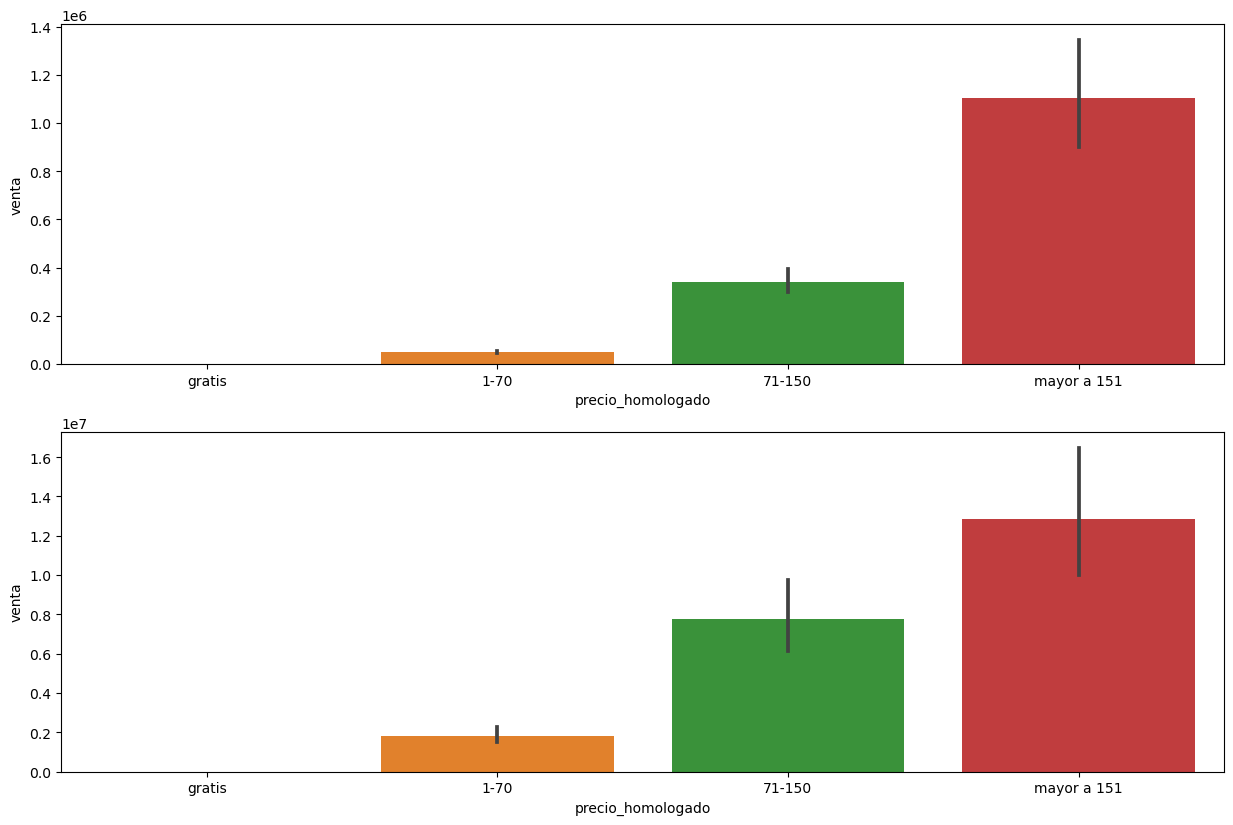

In [26]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
sns.barplot(data=udemy_df, x="precio_homologado", y="venta",order=["gratis","1-70","71-150","mayor a 151"])

plt.subplot(3,1,2)
sns.barplot(data=edx_df, x="precio_homologado", y="venta",order=["gratis","1-70","71-150","mayor a 151"])

#### Idioma

In [27]:
language_dic = {
' ':'English',
'Arabic':'Other',
'Deutsch':'Other',
'English':'English',
'Español':'Spanish',
'Français':'Other',
'French':'Other',
'Hindi':'Other',
'Italiano':'Other',
'Português':'Other',
'Portuguese':'Other',
'Portuguese (Brazilian)':'Other',
'Spanish':'Spanish',
'Türkçe':'Other',
'Urdu':'Other',
'русский':'Other',
'اللغة':'Other',
'한국어':'Other',
'中文':'Other',
'日本語':'Other',
'简体中文':'Other',
}
udemy_df["language_homologado"] = udemy_df["language"].map(language_dic)
edx_df["language_homologado"] = edx_df["language"].map(language_dic)
coursera_df["language_homologado"] = coursera_df["language"].map(language_dic)
#coursera_reviews_df["language_homologado"] = coursera_reviews_df["language"].map(language_dic)

d:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='language_homologado', ylabel='count'>

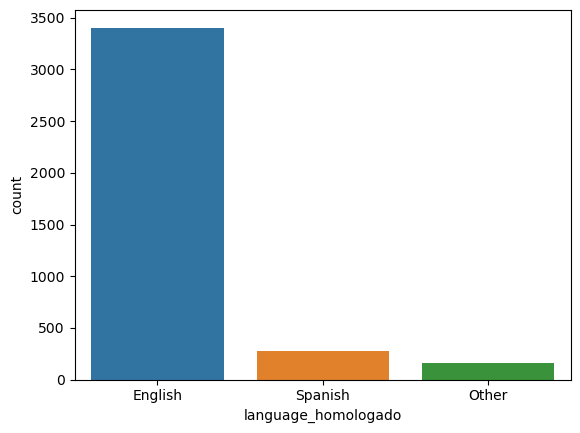

In [28]:
idioma = pd.concat([udemy_df["language_homologado"],coursera_df["language_homologado"],edx_df["language_homologado"]])
sns.countplot(idioma)

#### Nivel

In [29]:
Level_homologado = {
    'All Levels':'Introductory', 
    'Intermediate Level':'Intermediate', 
    'Beginner Level':'Introductory',
    'Expert Level':'Advanced',
    ' ':'Introductory', 
    'Intermediate Level':'Intermediate', 
    'Advanced Level':'Advanced',
    'Introductory':'Introductory', 
    'Intermediate':'Intermediate', 
    'Advanced':'Advanced'

}

udemy_df["Level_homologado"] = udemy_df["Level"].map(Level_homologado)
coursera_df["Level_homologado"] = coursera_df["Level"].map(Level_homologado)
edx_df["Level_homologado"] = edx_df["Level"].map(Level_homologado)

d:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Level_homologado', ylabel='count'>

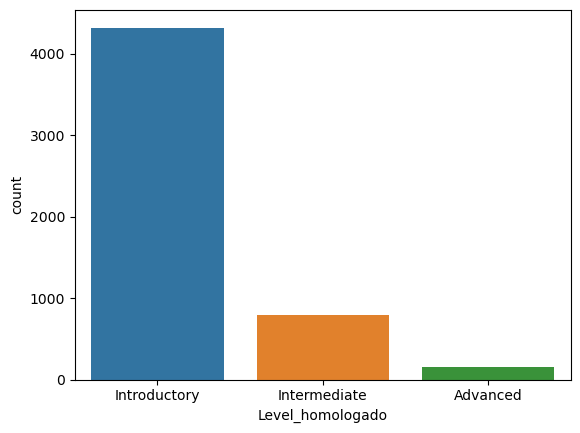

In [30]:
nivel_homologado = pd.concat([udemy_df["Level_homologado"],coursera_df["Level_homologado"],edx_df["Level_homologado"]])
sns.countplot(nivel_homologado)

#### Rating

In [31]:
udemy_df["rating"] = udemy_df["rating"].apply(lambda x: round(x,1))
udemy_df["rating"] = udemy_df["rating"].apply(lambda x: np.nan if isinstance(x,str) else x)
coursera_df["rating"] = coursera_df["rating"].apply(lambda x: np.nan if isinstance(x,str) else x)

In [32]:
rating_mean = pd.concat([udemy_df["rating"],coursera_df["rating"]])
rating_mean.mean()

4.11361000467761

In [33]:
def rating_homologado(x):
   
    if x >= 1 and x < 3:
        return "1-2.9"
    if x >=3 and x < 4:
        return "3-3.9"
    if x >= 4:
        return "4-5"

udemy_df["Level_homologado"] = udemy_df["Level"].map(Level_homologado)
coursera_df["Level_homologado"] = coursera_df["Level"].map(Level_homologado)



In [34]:
#consolidacion de datasets

udemy_df["plataforma"] = "Udemy"
coursera_df["plataforma"] = "Coursera"
edx_df["plataforma"] = "Edx"
coursera_reviews_df = coursera_reviews_df.merge(coursera_df,left_on="course_id",right_on="course_id",how="left")

udemy_df["title"] = udemy_df["title"].apply(lambda x: x.replace("'",'"'))

udemy_df.reset_index(inplace=True, drop=True)
coursera_df.reset_index(inplace=True, drop=True)
edx_df.reset_index(inplace=True, drop=True)
coursera_reviews_df.reset_index(inplace=True, drop=True)


In [35]:
moocs_df = pd.concat([udemy_df,coursera_df,edx_df])

In [36]:
#usaremos moocs_df para realizar el dashbord, por lo cual, vamos a llegarlo a csv y lleerlo en powerbi
moocs_df["published_timestamp"] = pd.to_datetime(moocs_df["published_timestamp"],format='%Y-%m-%d')
moocs_df.to_csv("moocs_df.csv",sep="|")
coursera_reviews_df.to_csv("coursera_reviews_df.csv",sep="|")

### EDA


Text(0.5, 0.98, 'Cantidad de cursos por rango de precio y plataforma')

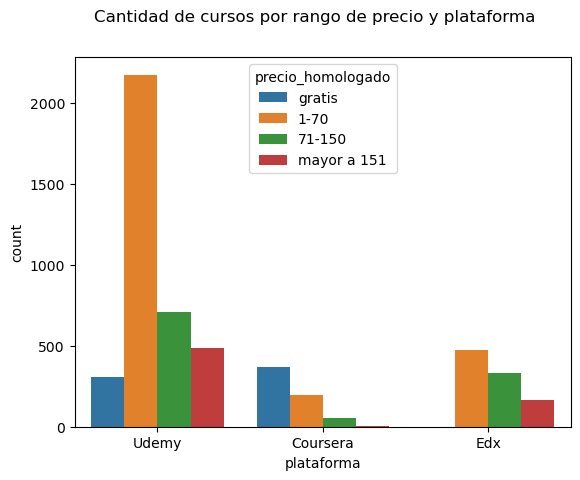

In [40]:
sns.countplot(data=moocs_df,hue="precio_homologado", x="plataforma", hue_order=["gratis","1-70","71-150","mayor a 151"])
plt.suptitle("Cantidad de cursos por rango de precio y plataforma")

In [41]:
moocs_df.columns

Index(['course_id', 'title', 'url', 'is_paid', 'price', 'n_enrolled',
       'num_reviews', 'num_lectures', 'Level', 'course_length_hours',
       'published_timestamp', 'subject', 'summary', 'institution', 'rating',
       'duracion', 'language', 'instructors', 'subject_homologado',
       'precio_homologado', 'venta', 'language_homologado', 'Level_homologado',
       'plataforma', 'course_type', 'subtitles', 'course_effort',
       'num_reviews2', 'duracion_unit', 'course_description',
       'course_syllabus', 'price_edx'],
      dtype='object')

<AxesSubplot:xlabel='precio_homologado', ylabel='n_enrolled'>

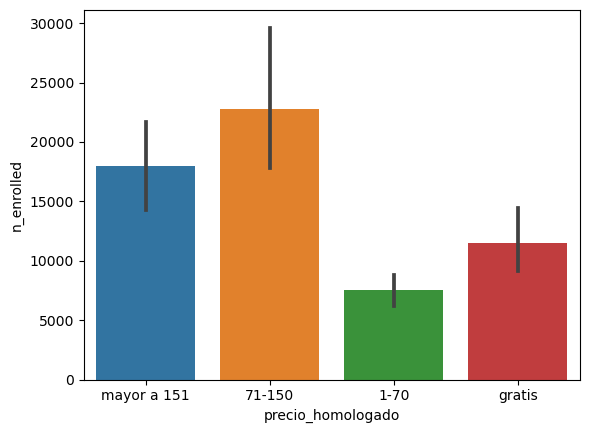

In [53]:
#sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
#            sizes=(40, 400), alpha=.5, palette="muted",
#            height=6, data=mpg)
sns.barplot(data=moocs_df,x="precio_homologado",y="n_enrolled")


(3.5, 5.0)

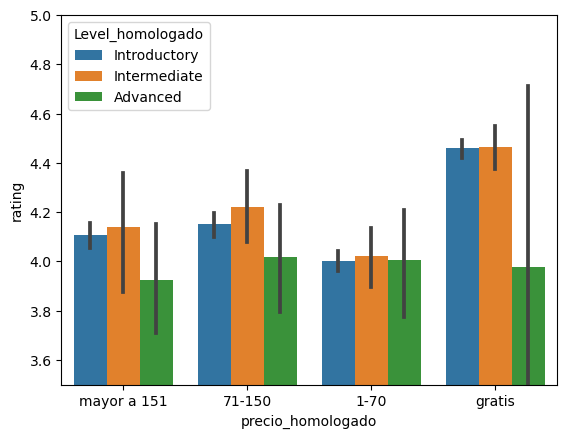

In [62]:
sns.barplot(data=moocs_df,x="precio_homologado",y="rating",hue="Level_homologado")
plt.ylim(3.5,5)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Business'),
  Text(1, 0, 'Design'),
  Text(2, 0, 'Music'),
  Text(3, 0, 'Information Technology'),
  Text(4, 0, 'Arts and Humanities'),
  Text(5, 0, 'Personal Development'),
  Text(6, 0, 'Health'),
  Text(7, 0, 'Language Learning'),
  Text(8, 0, 'Science and Engineering'),
  Text(9, 0, 'Communication'),
  Text(10, 0, 'Math and Logic')])

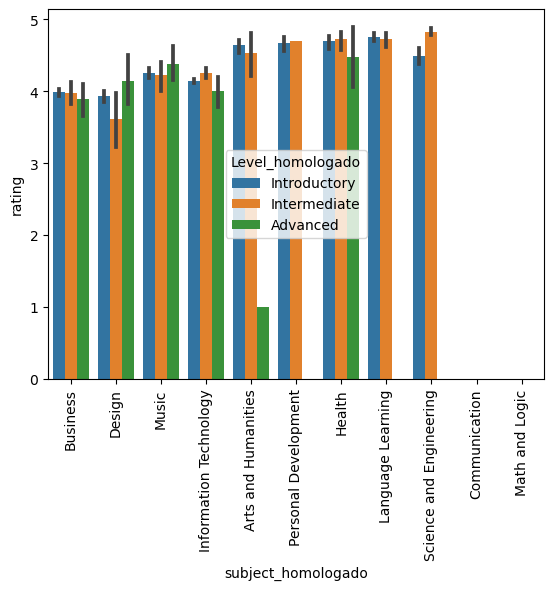

In [65]:
sns.barplot(data=moocs_df,x="subject_homologado",y="rating",hue="Level_homologado")
plt.xticks(rotation=90)

<AxesSubplot:xlabel='price', ylabel='n_enrolled'>

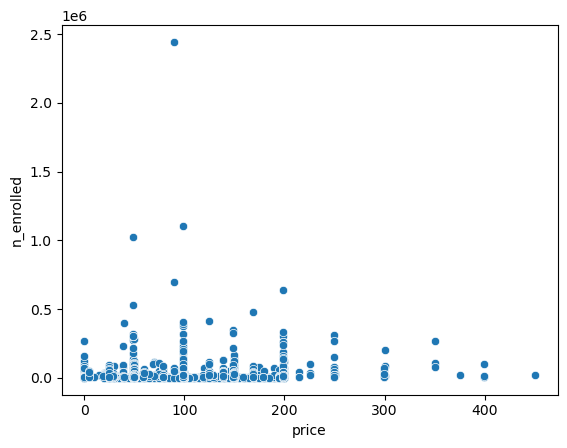

In [67]:
sns.scatterplot(data=moocs_df,x="price",y="n_enrolled")

<AxesSubplot:>

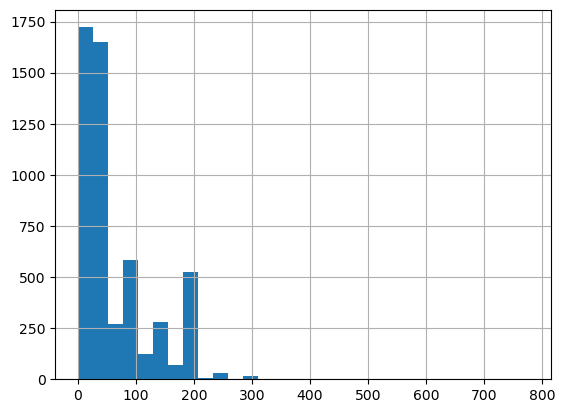

In [70]:
moocs_df["price"].hist(bins=30)

<AxesSubplot:xlabel='language_homologado', ylabel='n_enrolled'>

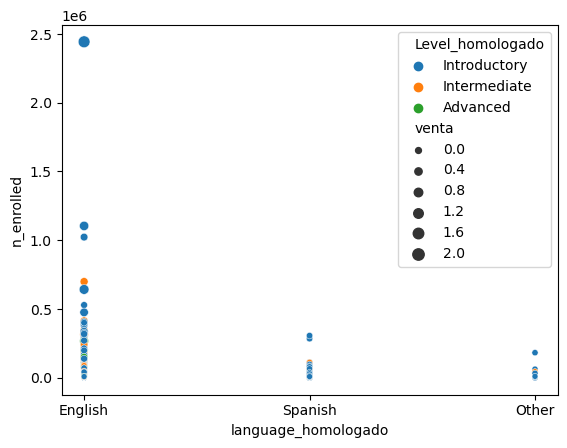

In [78]:
sns.scatterplot(data=moocs_df,x="language_homologado",y="n_enrolled",hue="Level_homologado",size="venta")

<AxesSubplot:xlabel='price', ylabel='rating'>

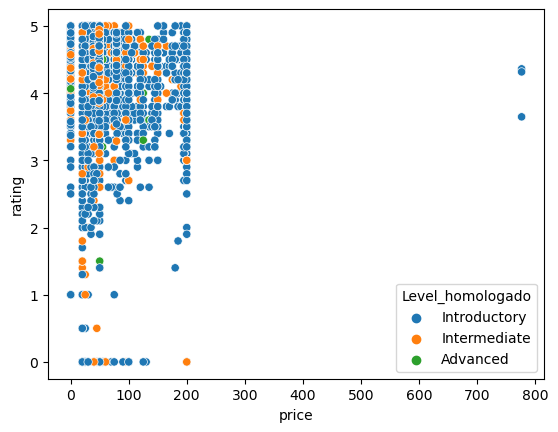

In [82]:
sns.scatterplot(data=moocs_df,x="price",y="rating",hue="Level_homologado")